# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [4]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print "---------------------------------------"
        print 'Label' + str(i) + ':', train_labels[i], 
        print 'Data' + str(i) + ':' ,train_data[i]

### STUDENT END ###
P1(5)

---------------------------------------
Label0: 1 Data0: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
---------------------------------------
Label1: 3 Data1: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have be

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [15]:
def P2():
### STUDENT START ###
    
    # Solution to Part A
    countVectorizer = CountVectorizer()
    train_counts_default = countVectorizer.fit_transform(train_data)
    print "---- Part A ----"
    print 'Size of the vocabulary', len(countVectorizer.vocabulary_)
    print 'Avg number of Non zero features from training data: ', float(train_counts_default.nnz)/2034.0
    print 'Fraction of non zero entries from training data: ', float(train_counts_default.nnz)/(26879.0*2034)
    
    #Solution to Part B
    print "---- Part B ----"
    print 'First Feature String: ',countVectorizer.get_feature_names()[0]
    print 'Last Feature String: ', countVectorizer.get_feature_names()[26878]
    
    #Solution to part C
    countVectorizer2 = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    train_counts_custom_vocab = countVectorizer2.transform(train_data)
    print "---- Part C ----"
    print 'Shape with custom vocabulary: ', train_counts_custom_vocab.shape
    print 'Avg number of Non zero features with custom vocabulary: ',float(train_counts_custom_vocab.nnz)/2034.0
    
    #Solution to part D
    countVectorizer3 = CountVectorizer(analyzer='char', ngram_range=(2,2))
    train_counts_bigram = countVectorizer3.fit_transform(train_data)
    print "---- Part D ----"
    print 'Size of Vocabulary for bigram data:' , len(countVectorizer3.vocabulary_)
    
    countVectorizer4 = CountVectorizer(analyzer='char', ngram_range=(3,3))
    train_counts_trigram = countVectorizer4.fit_transform(train_data)
    print 'Size of Vocabulary for trigram data:' , len(countVectorizer4.vocabulary_)
    
    #Solution to part E
    countVectorizer5 = CountVectorizer(min_df=10)
    train_counts_min10 = countVectorizer5.fit_transform(train_data)
    print "---- Part E ----"
    print 'Size of vocab with min_df=10: ', len(countVectorizer5.vocabulary_)
    
    #Solution to Part F
    countVectorizer6 = CountVectorizer()
    train_counts_dev = countVectorizer6.fit_transform(dev_data)
    print "---- Part F ----"
    print 'Size of vocab with dev data: ', len(countVectorizer6.vocabulary_)
    print 'Fraction of words missing in dev data: ', float(len(countVectorizer.vocabulary_)-len(countVectorizer6.vocabulary_))/float(26879)
    
### STUDENT END ###

P2()

---- Part A ----
Size of the vocabulary 26879
Avg number of Non zero features from training data:  96.7059980334
Fraction of non zero entries from training data:  0.00359782722696
---- Part B ----
First Feature String:  00
Last Feature String:  zyxel
---- Part C ----
Shape with custom vocabulary:  (2034, 4)
Avg number of Non zero features with custom vocabulary:  0.268436578171
---- Part D ----
Size of Vocabulary for bigram data: 3291
Size of Vocabulary for trigram data: 32187
---- Part E ----
Size of vocab with min_df=10:  3064
---- Part F ----
Size of vocab with dev data:  16246
Fraction of words missing in dev data:  0.395587633469


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [68]:
def P3():
### STUDENT START ###
    # Creatign Vectorizer and transforming Data
    countVectorizer_p3 = CountVectorizer()
    train_counts_default_p3 = countVectorizer_p3.fit_transform(train_data)
    dev_count_default_p3 = countVectorizer_p3.transform(dev_data)

    #KNN
    knn_clf_p3 = KNeighborsClassifier()
    knn_params = {'n_neighbors':[1,5,10,25,75,90,95,96,97,100,138,151,196]}
    gsv_knn = GridSearchCV(knn_clf_p3,knn_params,scoring='f1_weighted')
    gsv_knn.fit(train_counts_default_p3,train_labels)
    print "The best k value is: ", gsv_knn.best_params_
    
    #MNB
    mnb_clf_p3 = MultinomialNB()
    mnb_params = {'alpha':[0.000000000000001,0.00000000000001,0.0000000000001,0.000000000001,0.00000000001, 0.0000000001,0.0000001,0.00001,0.001,0.1,1,0]}
    gsv_mnb = GridSearchCV(mnb_clf_p3,mnb_params,scoring='f1_weighted')
    gsv_mnb.fit(train_counts_default_p3,train_labels)
    print "The best alpha value is: ", gsv_mnb.best_params_

    #Linear Regression
    lr_params = [0.001,0.1,0.5,0.55,0.9]
    scores = np.empty((5,))
    count = 0;
    
    #Iterating through C values 
    for c in lr_params:
        #Creating Classifier
        lr_clf_p3 = LogisticRegression(C=c) 
        model_p3 = lr_clf_p3.fit(train_counts_default_p3,train_labels)
        
        #Predicting Labels
        predicted_labels_p3_lr = lr_clf_p3.predict(dev_count_default_p3)
        scores[count]=metrics.f1_score(dev_labels,predicted_labels_p3_lr,average='weighted')
        #Printing Sum of squared wieght values
        print 'Sq Wt for C Value =  ' + str(c)+ ': ',np.sum(np.square(model_p3.coef_[0])),np.sum(np.square(model_p3.coef_[1])),np.sum(np.square(model_p3.coef_[2])),np.sum(np.square(model_p3.coef_[3]))
        count+=1
        
    #Picking Best C value   
    index_p3 = np.where(scores==np.max(scores))[0] 
    print 'Best C value:', lr_params[index_p3[0]]
    ### STUDENT END ###
P3()

The best k value is:  {'n_neighbors': 96}
The best alpha value is:  {'alpha': 0.001}
Sq Wt for C Value =  0.001:  0.165093451668 0.200952746906 0.180670937544 0.187242784378
Sq Wt for C Value =  0.1:  27.1329066559 24.6514700596 27.4584362709 23.0252827023
Sq Wt for C Value =  0.5:  102.617119623 83.0974299707 98.9817991014 88.9954200425
Sq Wt for C Value =  0.55:  110.0563964 88.7018240956 105.895063286 95.5324015465
Sq Wt for C Value =  0.9:  155.596118592 122.489008308 147.678631866 135.716920575
Best C value: 0.55


ANSWER: 
        a)KNN does not work well because it has a tendency to overfit the training data. So it does not work for high dimensional problems.
        b) Logistic Regression does not work as well as it over fits the data too. The regularization improves that a little.
        c)As the C value increases the sum of squared weights increases.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [69]:
def P4():
### STUDENT START ###
    
    #Unigram
    #Creating Vectorizer and transforming data
    countVectorizer_p4 = CountVectorizer()
    train_counts_default_p4 = countVectorizer_p4.fit_transform(train_data)
    dev_counts_default_p4 = countVectorizer_p4.transform(dev_data)
        
    lr_clf_p4 = LogisticRegression(C=0.5,)
    lr_clf_p4 =  lr_clf_p4.fit(train_counts_default_p4, train_labels)
    
    print 'Score:',lr_clf_p4.score(dev_counts_default_p4,dev_labels)
    
    #Sorting the weights for each class.
    model_coef = lr_clf_p4.coef_
    model_coef_sorted = np.argsort(model_coef, axis=1)
    
    #Picking indices for 5 highest wts for each class.
    sorted_wt_indices = model_coef_sorted[0:4,-5:].reshape(20,)
    
    #Creating 20x4 Table of weights
    table  = np.zeros((20,4),dtype=float)
    for row in range(len(sorted_wt_indices)):
        for column in range(4):
            table[row,column] = model_coef[column,sorted_wt_indices[row]]
    
    #Getting Features Names
    unigram_ft = getFeatures(sorted_wt_indices,countVectorizer_p4.vocabulary_)
    #Printing table
    printTable(unigram_ft,table)
    
    #Bi-gram
    #Creating Vectorizer and transforming data
    countVectorizer_p4_2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
    train_counts_default_p4_2 = countVectorizer_p4_2.fit_transform(train_data)
    dev_counts_default_p4_2 = countVectorizer_p4_2.transform(dev_data)
    
    lr_clf_p4_2 = LogisticRegression(C=0.5,)
    lr_clf_p4_2 =  lr_clf_p4_2.fit(train_counts_default_p4_2, train_labels)
    
    print 'Bi-gram Score:',lr_clf_p4_2.score(dev_counts_default_p4_2,dev_labels)
    
    #Sorting the weights for each class.
    model_coef_2 = lr_clf_p4_2.coef_
    model_coef_sorted_2 = np.argsort(model_coef_2, axis=1)
    
    #Picking indices 5 highest wts for each class.
    sorted_wt_indices_2 = model_coef_sorted_2[0:4,-5:].reshape(20,)
    table_2  = np.zeros((20,4),dtype=float)
    
    #Creating 20x4 Table of weights
    for row in range(len(sorted_wt_indices_2)):
        for column in range(4):
            table_2[row,column] = model_coef_2[column,sorted_wt_indices_2[row]]
    #Getting Feature Names
    bigram_ft = getFeatures(sorted_wt_indices_2,countVectorizer_p4_2.vocabulary_)
    #Printing Tables
    printTable(bigram_ft, table_2)

#Helper method for printing the Tables
def printTable(features,tables):
    print categories
    count=0
    print 'Printing Table with:', len(features),len(tables)
    for row in range(len(tables)):
        print features[row], tables[row]
        #print count
        #count+=1
    
#Helper method for getting feature names     
def getFeatures(indices,vocab):
    count=0
    feature_name = ['']*20
    for feature in vocab:
        if vocab.get(feature) in indices:
            index = (np.where(indices == vocab.get(feature))[0])
            for ind in index:
                    feature_name[ind]=feature
                    count=count+1
        if count ==20:
            break
    return feature_name
### STUDENT END ###
P4()

Score: 0.71449704142
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
Printing Table with: 20 20
deletion [ 0.72375354 -0.24943135 -0.2724702  -0.27028024]
atheism [ 0.79470832 -0.35026576 -0.36720343 -0.37695904]
religion [ 0.79842119 -0.50836508 -0.6589265  -0.05054349]
bobby [ 0.82358678 -0.19127309 -0.28666387 -0.38725038]
atheists [ 0.83402929 -0.09345436 -0.26699008 -0.63760865]
computer [ 0.07136329  0.84450679 -0.56946574 -0.39634462]
3d [-0.30350504  0.94173374 -0.57104106 -0.3175636 ]
file [-0.27531187  1.05954573 -0.68272795 -0.5063008 ]
image [-0.46951847  1.11683566 -0.6718813  -0.38053211]
graphics [-0.64092059  1.62614474 -1.10311568 -0.62640709]
spacecraft [-0.2974424  -0.32206469  0.73706954 -0.29176272]
launch [-0.37751284 -0.39677083  0.78390175 -0.28075219]
nasa [-0.46536199 -0.41044357  0.85149584 -0.40160994]
orbit [-0.3503199  -0.55953686  1.01278637 -0.49904463]
space [-1.06135769 -1.11616195  1.8642866  -0.97213294]
order [-0.64955492 -0.0656

ANSWER: The bi-gram "cheers kent" appears twice as it has the highest weight for the first and the last label.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [138]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    s=s.lower()
    s= stem(s)
    
    return s

def stem(s):
    s= re.sub(r"ly\b|s\b|est\b|ed\b|en\b|",r"",s)
    return s

def P5():
### STUDENT START ###

    countVectorizer_p5 = CountVectorizer(preprocessor=empty_preprocessor)
    train_counts_default_p5 = countVectorizer_p5.fit_transform(train_data)
    dev_counts_default_p5 = countVectorizer_p5.transform(dev_data)
    
    lr_clf_p5 = LogisticRegression(C=0.5)
    lr_clf_p5 = lr_clf_p5.fit(train_counts_default_p5,train_labels)
    predicted_labels_p5 =  lr_clf_p5.predict(dev_counts_default_p5)
    print 'Score with emptys preprocessor:',metrics.f1_score(dev_labels,predicted_labels_p5,average='weighted')
    
    countVectorizer_p5_2 = CountVectorizer(preprocessor=better_preprocessor)
    train_counts_default_p5_2 = countVectorizer_p5_2.fit_transform(train_data)
    dev_counts_default_p5_2 = countVectorizer_p5_2.transform(dev_data)
    
    lr_clf_p5_2 = LogisticRegression(C=0.5)
    lr_clf_p5_2 = lr_clf_p5_2.fit(train_counts_default_p5_2,train_labels)
    predicted_labels_p5_2 =  lr_clf_p5_2.predict(dev_counts_default_p5_2)
    print 'Score with better preprocessor:',metrics.f1_score(dev_labels,predicted_labels_p5_2,average='weighted')
    print 'Dictionary Size Reduced by: ', len(countVectorizer_p5.vocabulary_)-len(countVectorizer_p5_2.vocabulary_)
    
    
### STUDENT END ###
P5()

Score with emptys preprocessor: 0.706910918549
Score with better preprocessor: 0.723261224218
Dictionary Size Reduced by:  10265


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

Number of Non Zero weights for l1:  1213
Number of Non Zero weights for l2:  107516
[0.30957140795868543, 0.66606528900467765, 0.69450592208584128, 0.66936945510110402, 0.6687889546565241, 0.67335974417416433, 0.67642727636424826, 0.6720577975942772, 0.68046884890444692, 0.66810475324871188, 0.67680478386591114]
[2, 211, 365, 509, 643, 715, 833, 898, 935, 1018, 1484]


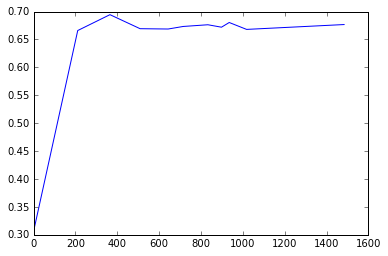

In [117]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    #Creating Vectorizer and Transforming Data
    countVectorizer_p6 = CountVectorizer()
    train_counts_default_p6 = countVectorizer_p6.fit_transform(train_data)
    dev_counts_default_p6 = countVectorizer_p6.transform(dev_data)
    
    #Training model with L1 Regularization
    lr_clf_p6 = LogisticRegression(penalty='l1',C=0.5,tol=0.01)
    lr_clf_p6 =  lr_clf_p6.fit(train_counts_default_p6, train_labels)
    
    #Training model with L2 Regularization 
    lr_clf_p6_2 = LogisticRegression(penalty='l2',C=0.5,tol=0.01)
    lr_clf_p6_2 =  lr_clf_p6_2.fit(train_counts_default_p6, train_labels)

    print 'Number of Non Zero weights for l1: ', np.count_nonzero(lr_clf_p6.coef_)
    print 'Number of Non Zero weights for l2: ',np.count_nonzero(lr_clf_p6_2.coef_)
    

    #Retraing Model.
    c_values = [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    accuracies = []
    vocab_sizes =[]
    for c in c_values:
        
        #Training model with L1 Regularization
        lr_clf_p6 = LogisticRegression(penalty='l1',C=c,tol=0.01)
        lr_clf_p6 =  lr_clf_p6.fit(train_counts_default_p6, train_labels)
    
        
        #Modifying vocabulary by keeping only features with non zero weights
        modified_vocab = getModifiedVocabulary(lr_clf_p6.coef_, countVectorizer_p6.vocabulary_)
    
        #Retransforming data 
        countVectorizer_p6_3 = CountVectorizer(vocabulary=modified_vocab)
        train_counts_l2_p6= countVectorizer_p6_3.fit_transform(train_data)
        dev_counts_l2_p6 = countVectorizer_p6_3.transform(dev_data)
    

        lr_clf_p6_3 = LogisticRegression(penalty='l2',C=c,tol=0.01)
        lr_clf_p6_3 =  lr_clf_p6_3.fit(train_counts_l2_p6, train_labels)
        predicted_labels = lr_clf_p6_3.predict(dev_counts_l2_p6)
        accuracies.append(metrics.f1_score(dev_labels,predicted_labels,average='weighted'))
        vocab_sizes.append(len(modified_vocab))
    
    plt.plot(vocab_sizes,accuracies)
    
#Helper method to transform vocabulary.    
def getModifiedVocabulary(weights, vocab):
    mod_vocab = []
    count =0 
    for key in vocab:
        index = vocab.get(key)
        if weights[0,index] !=0 or weights[1,index]!=0 or weights[2,index]!=0 or weights[3,index]!=0:
            mod_vocab.append(key)
            count+=1
    return mod_vocab    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [158]:
def P7():
    ### STUDENT START ###
    
    #Creating vectorizer and transforming data
    tf_Vectorizer = TfidfVectorizer()
    train_tf_count_p7 = tf_Vectorizer.fit_transform(train_data)
    dev_tf_count_p7 = tf_Vectorizer.transform(dev_data)
    
    #training model
    lr_clf_p7 = LogisticRegression(C=100)
    lr_clf_p7 = lr_clf_p7.fit(train_tf_count_p7,train_labels)
    predicted_labels_p7 = lr_clf_p7.predict(dev_tf_count_p7)
    print 'Score:',metrics.f1_score(dev_labels,predicted_labels_p7,average = 'weighted')
    
    #Getting Probabilities and Printing R values.
    predicted_prob = lr_clf_p7.predict_proba(dev_tf_count_p7)
    r_values = np.zeros(len(predicted_prob))
    
    for row in range(len(predicted_prob)):
        probs = predicted_prob[row]
        r_values[row] = float(np.max(probs))/float(probs[dev_labels[row]])
    largest_r = np.argsort(r_values)[-3:]
    for lr in largest_r:
        print dev_data[lr]
    ### STUDENT END ###
P7()

Score: 0.759766242785

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* co

ANSWER: The tf idf count vectorizer converts the documents into a matrix of tf idf scores. This means the term frequency -inverse document frequency. This allows the commonly occuring words to be weighted lower than the less commonly occuring words.

One problem with this model is that some documents eill not contain some words, so their tf idf statistic would be 0, however we would still need to learn weights for them.

This can be avoided by removing these terms from the vocabulary.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance